## Overview and EDA of tabular data

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns


In [3]:
df_train =  pd.read_csv("../data/train.csv")
df_train.head(5)


,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750


In [4]:
df_train.describe()
print(df_train.isna().sum())

sample_id        0
image_path       0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
target_name      0
target           0
dtype: int64


In [5]:
target_names = pd.unique(df_train["target_name"])
print(target_names) #GDM being "Green dry mass"

['Dry_Clover_g' 'Dry_Dead_g' 'Dry_Green_g' 'Dry_Total_g' 'GDM_g']


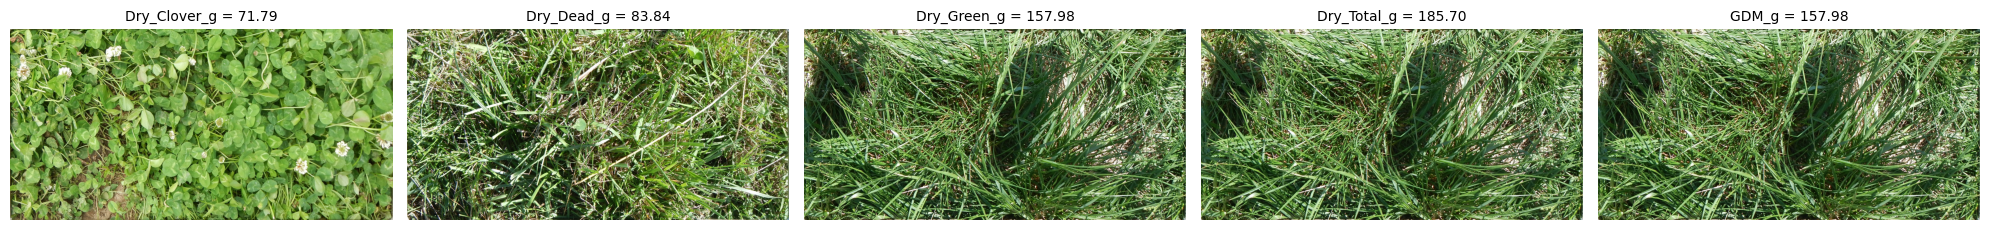

In [ ]:

df_best = df_train.loc[df_train.groupby('target_name')['target'].idxmax()]
df_best = df_best.set_index('target_name').loc[target_names].reset_index()

n = len(df_best)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))
if n == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, df_best.iterrows()):
    img = Image.open(f"../data/{row['image_path']}")
    ax.imshow(img)
    ax.set_title(f"{row['target_name']} = {row['target']:.2f}", fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

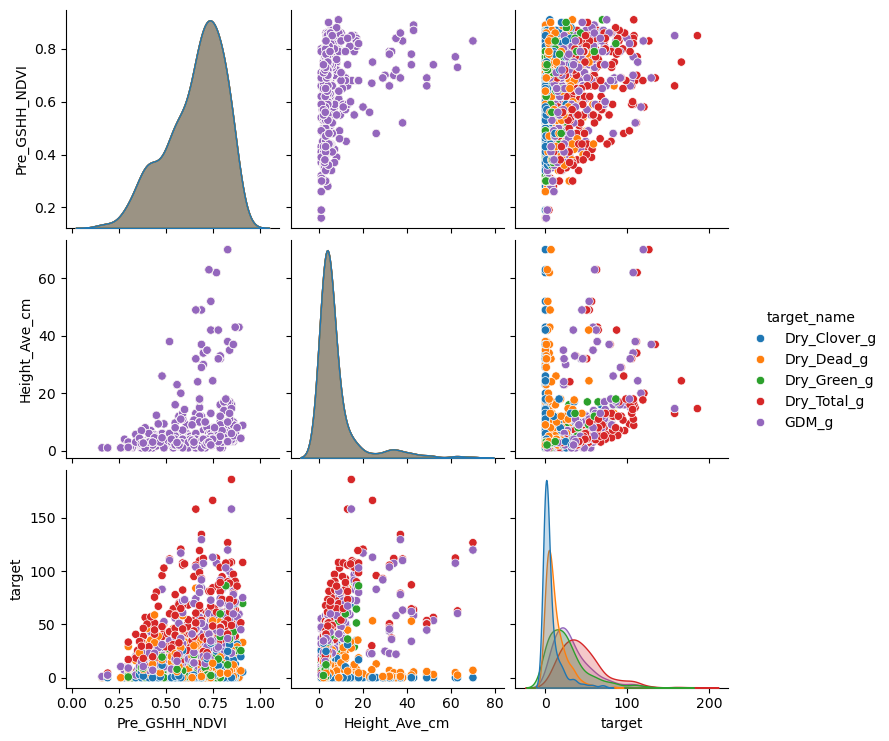

In [ ]:
sns.pairplot(df_train, hue="target_name")
plt.title("Pairplot of features colored by target_name")
plt.show()

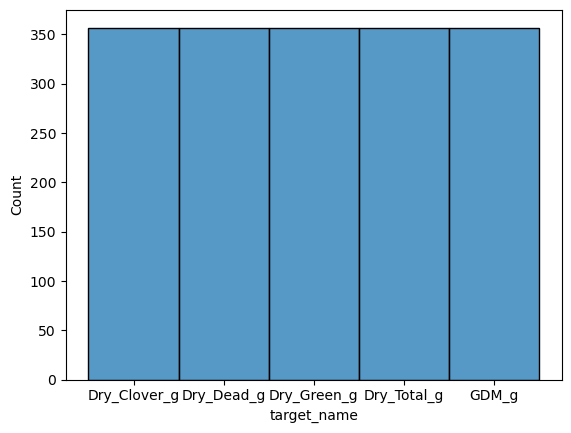

,Pre_GSHH_NDVI,Height_Ave_cm,target
count,1785.000000,1785.000000,1785.000000
mean,0.657423,7.595985,24.782295
std,0.151972,10.273725,25.823738
min,0.160000,1.000000,0.000000
25%,0.560000,3.000000,4.818200
50%,0.690000,4.000000,18.200000
75%,0.770000,7.000000,35.940600
max,0.910000,70.000000,185.700000


In [ ]:
sns.histplot(data=df_train,x="target_name")
plt.show()
df_train.describe()

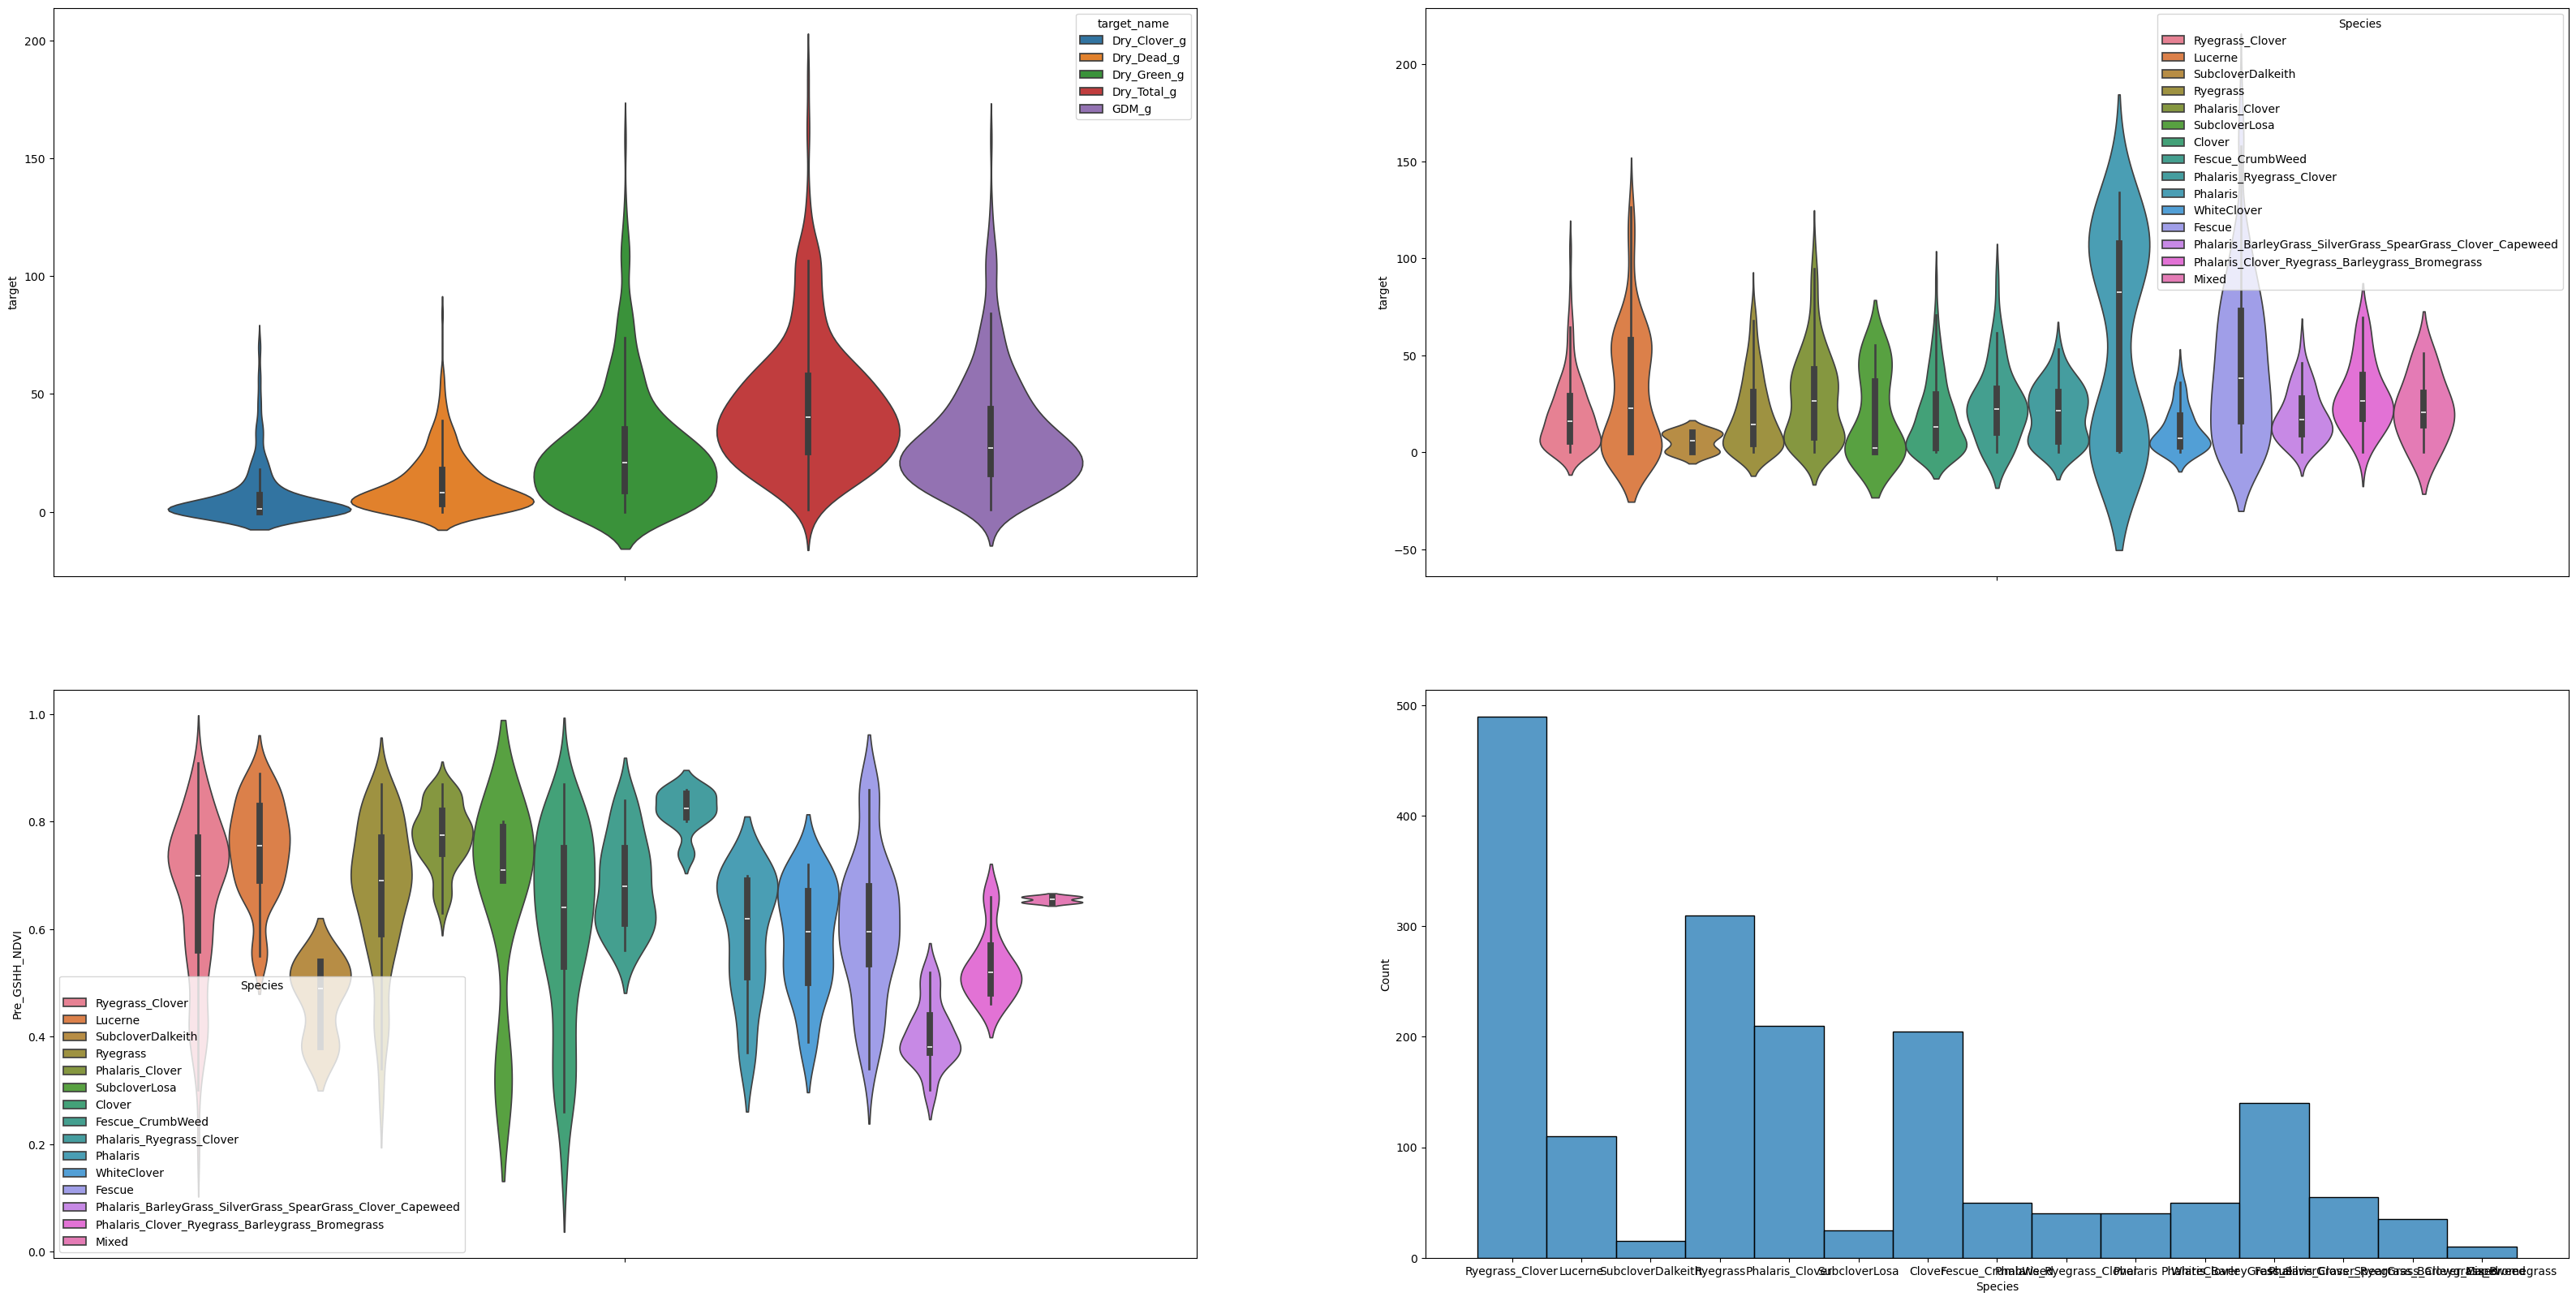

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(40, 20))

sns.violinplot(data=df_train, y="target", hue="target_name", ax=ax[0][0])
sns.violinplot(data=df_train, y="Pre_GSHH_NDVI", hue="Species", ax=ax[1][0])
sns.violinplot(data=df_train, y="target", hue="Species", ax=ax[0][1])
sns.histplot(data=df_train,x="Species",ax=ax[1][1])

plt.show()


In [38]:
#Check if the NVDI (measures how "green" the measured part is correlates with the different targets)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

results = {}

targets = target_names
for t in targets:
    df_sub = df_train[df_train["target_name"]==t]
    X = df_sub[["Pre_GSHH_NDVI"]].values
    y = df_sub["target"].values
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    results[t] = r2_score(y, y_pred)
print(results)




{'Dry_Clover_g': 0.05024326768171561, 'Dry_Dead_g': 0.015084337034939499, 'Dry_Green_g': 0.12323894764341059, 'Dry_Total_g': 0.13053098484381764, 'GDM_g': 0.21765373275975541}


We get a relatively high R^2 for our GDM target which makes sense because it is the total green biomass and low values for the Dry_Dead target metric